# Encoding cyclical (seasonal) features

This section explains the way cyclical encoding can be carried out using `feature_encoders`.

The `CyclicalEncoder` takes `pandas.DataFrame`s as input and generates `numpy.ndarray`s as output.

The encoder can provide default values for `period` and `fourier_order` if `seasonality` is one of `daily`, `weekly` or `yearly`.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
from feature_encoders import CyclicalEncoder

## Load demo data

In [3]:
data = pd.read_csv('data/data.csv', parse_dates=[0], index_col=0)
data = data[~data['consumption_outlier']]

In [4]:
daily_consumption = data[['consumption']].resample('D').sum()

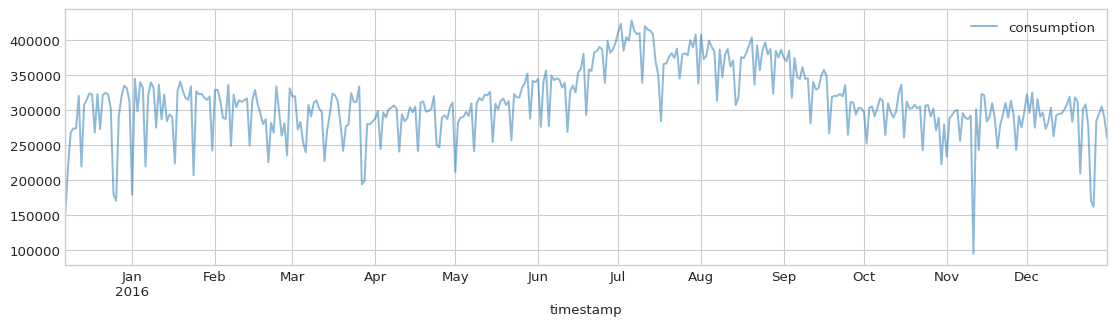

In [5]:
with plt.style.context('seaborn-whitegrid'):    
    fig = plt.figure(figsize=(14, 3.54), dpi=96)
    layout = (1, 1)
    ax = plt.subplot2grid(layout, (0, 0))
    
    daily_consumption.plot(ax=ax, alpha=0.5)

The number of seasonality features is always twice the `fourier_order`.

If `feature=None`, it is assumed that the datetime information is provided by the input dataframe's index

In [6]:
enc = CyclicalEncoder(feature=None, seasonality='yearly', fourier_order=3)
enc = enc.fit(daily_consumption)
enc.n_features_out_

6

Let’s plot the new features:

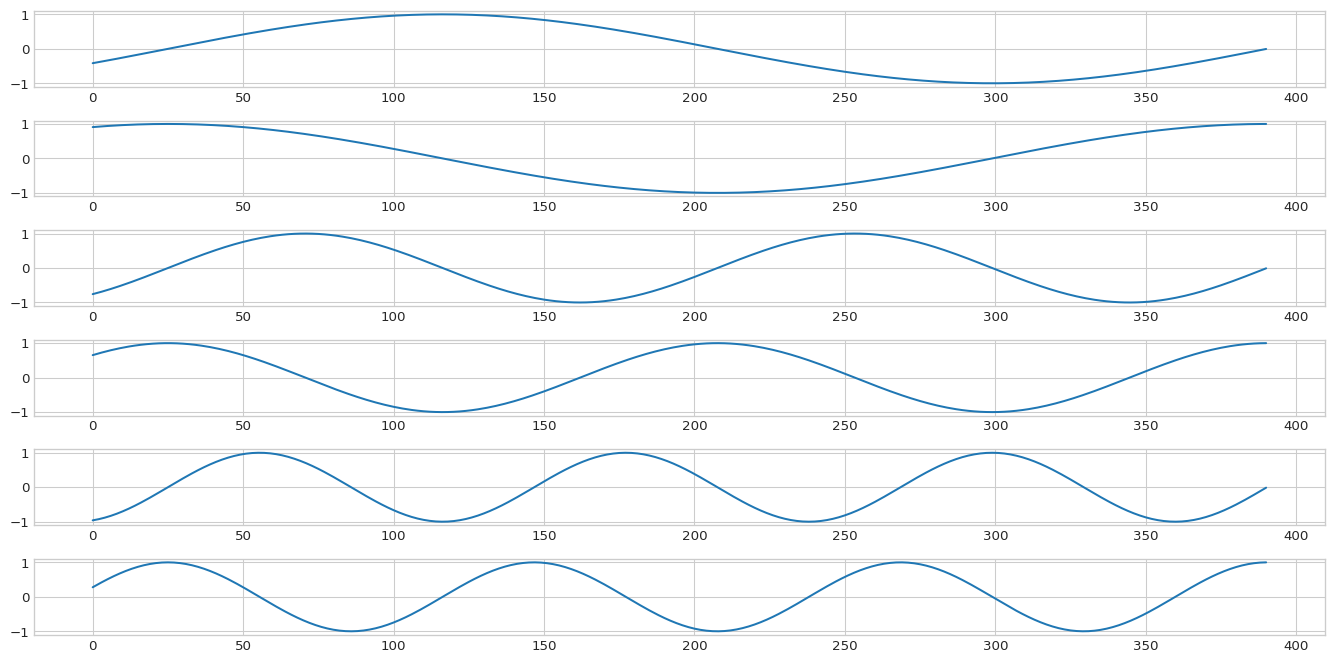

In [8]:
features = enc.transform(daily_consumption)

with plt.style.context('seaborn-whitegrid'):    
    fig, axs = plt.subplots(2*enc.fourier_order, figsize=(14, 7), dpi=96)
    
    for i in range(features.shape[1]):
        axs[i].plot(features[:, i])
    
fig.tight_layout()

Let's also see how well this transformation works:

In [10]:
regr = LinearRegression(fit_intercept=True).fit(features, daily_consumption)
pred = regr.predict(features)

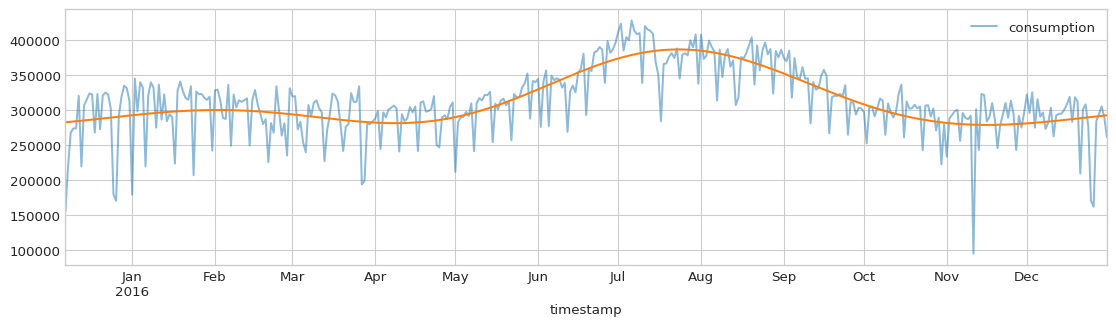

In [11]:
with plt.style.context('seaborn-whitegrid'):    
    fig = plt.figure(figsize=(14, 3.54), dpi=96)
    layout = (1, 1)
    ax = plt.subplot2grid(layout, (0, 0))
    
    daily_consumption.plot(ax=ax, alpha=0.5)
    pd.Series(pred.squeeze(), index=daily_consumption.index).plot(ax=ax)

-----------